In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [2]:
data=pd.read_csv('data.csv')

print(data.shape)

print(data.info())

print(data.head())

(9641, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9641 entries, 0 to 9640
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9641 non-null   object
 1   Retailer ID       9641 non-null   int64 
 2   Invoice Date      9641 non-null   object
 3   Region            9641 non-null   object
 4   State             9641 non-null   object
 5   City              9641 non-null   object
 6   Product           9641 non-null   object
 7   Price per Unit    9639 non-null   object
 8   Units Sold        9641 non-null   object
 9   Total Sales       9641 non-null   object
 10  Operating Profit  9641 non-null   object
 11  Sales Method      9641 non-null   object
dtypes: int64(1), object(11)
memory usage: 904.0+ KB
None
        Retailer  Retailer ID Invoice Date     Region      State         City  \
0        Walmart      1128299    6/17/2021  Southeast    Florida      Orlando   
1      West Gear  

In [3]:
data.isna().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      2
Units Sold          0
Total Sales         0
Operating Profit    0
Sales Method        0
dtype: int64

In [4]:
data.dropna(subset = "Price per Unit", inplace = True)
print(data.isna().sum())
print(data.head())

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Sales Method        0
dtype: int64
        Retailer  Retailer ID Invoice Date     Region      State         City  \
0        Walmart      1128299    6/17/2021  Southeast    Florida      Orlando   
1      West Gear      1128299    7/16/2021      South  Louisiana  New Orleans   
2  Sports Direct      1197831    8/25/2021      South    Alabama   Birmingham   
3  Sports Direct      1197831    8/27/2021      South    Alabama   Birmingham   
4  Sports Direct      1197831    8/21/2021      South    Alabama   Birmingham   

                   Product Price per Unit Units Sold Total Sales  \
0          Women's Apparel       $103.00         218       2,245   
1          Women's Apparel       $103.00         163       1,679   
2    Men's Street Footwear      

In [5]:
data.duplicated().sum()

0

In [6]:
data.describe(include=object)

Retailer Invoice Date Region       State      City  \
count          9639         9639   9639        9639      9639   
unique            6          724      5          50        52   
top     Foot Locker    1/17/2021   West  California  Portland   
freq           2633           77   2446         430       360   

                      Product Price per Unit Units Sold Total Sales  \
count                    9639           9639       9639        9639   
unique                      7             94        361        1710   
top     Men's Street Footwear        $50.00         225      10,000   
freq                     1610            674        207          66   

       Operating Profit Sales Method  
count              9639         9639  
unique             1529            3  
top             $6,300        Online  
freq                 39         4889

In [7]:
sns.set_style("darkgrid")
sns.set_palette("pastel")

['Walmart' 'West Gear' 'Sports Direct' 'Foot Locker' 'Amazon' "Kohl's"]


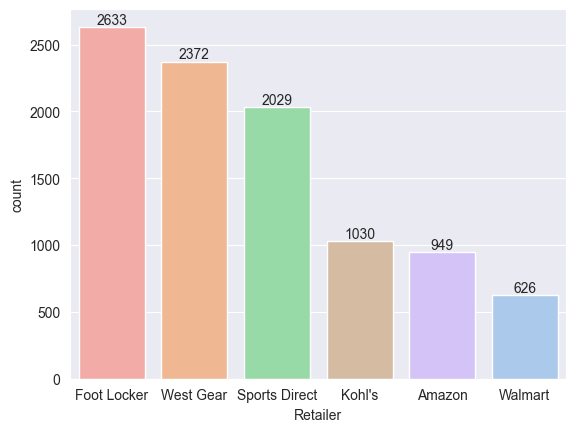

In [8]:
print(data['Retailer'].unique())
graph = sns.countplot(x = "Retailer", data = data, order = data.Retailer.value_counts().index,hue='Retailer')
for container in graph.containers:
    graph.bar_label(container)
plt.show()

In [9]:
print(data["Invoice Date"].unique()[:50])
data['Invoice Date'] = pd.to_datetime(data['Invoice Date'])
data['Month'] = data['Invoice Date'].dt.month
data['Year'] = data['Invoice Date'].dt.year
data['Day'] = data['Invoice Date'].dt.day

['6/17/2021' '7/16/2021' '8/25/2021' '8/27/2021' '8/21/2021' '1/11/2021'
 '11/17/2021' '1/23/2021' '4/3/2021' '3/10/2020' '1/18/2021' '2/11/2021'
 '6/11/2021' '4/10/2021' '3/16/2021' '9/16/2021' '2/21/2021' '10/21/2021'
 '5/3/2020' '4/19/2020' '4/27/2020' '3/10/2021' '10/11/2021' '11/11/2021'
 '3/4/2020' '1/25/2020' '1/7/2020' '1/1/2020' '2/7/2021' '8/22/2021'
 '2/18/2021' '8/11/2021' '4/17/2021' '11/20/2021' '3/16/2020' '8/26/2020'
 '9/1/2020' '1/31/2020' '2/6/2020' '3/17/2020' '4/18/2020' '3/15/2020'
 '3/17/2021' '6/18/2021' '10/18/2021' '11/18/2021' '5/12/2021' '9/12/2021'
 '3/19/2021' '9/19/2021']


In [10]:
def find_seasons(monthNumber):
    if monthNumber in [12, 1, 2]:
        return 'Winter'
    elif monthNumber in [3, 4, 5]:
        return 'Spring'
    elif monthNumber in [6, 7, 8]:
        return 'Summer'
    elif monthNumber in [9, 10, 11]:
        return 'Autumn'
data['Season'] = data['Month'].apply(find_seasons)

data['Month'] = pd.to_datetime(data['Month'], format='%m').dt.month_name()

data.drop(columns = ['Retailer ID'], inplace = True)
data.head()

Retailer Invoice Date     Region      State         City  \
0        Walmart   2021-06-17  Southeast    Florida      Orlando   
1      West Gear   2021-07-16      South  Louisiana  New Orleans   
2  Sports Direct   2021-08-25      South    Alabama   Birmingham   
3  Sports Direct   2021-08-27      South    Alabama   Birmingham   
4  Sports Direct   2021-08-21      South    Alabama   Birmingham   

                   Product Price per Unit Units Sold Total Sales  \
0          Women's Apparel       $103.00         218       2,245   
1          Women's Apparel       $103.00         163       1,679   
2    Men's Street Footwear        $10.00         700       7,000   
3  Women's Street Footwear        $15.00         575       8,625   
4  Women's Street Footwear        $15.00         475       7,125   

  Operating Profit Sales Method   Month  Year  Day  Season  
0          $1,257        Online    June  2021   17  Summer  
1            $806        Online    July  2021   16  Summer  
2          $3,150        Outlet  August  2021   25  Summer  
3          $3,881        Outlet  August  2021   27  Summer  
4          $3,206        Outlet  August  2021   21  Summer

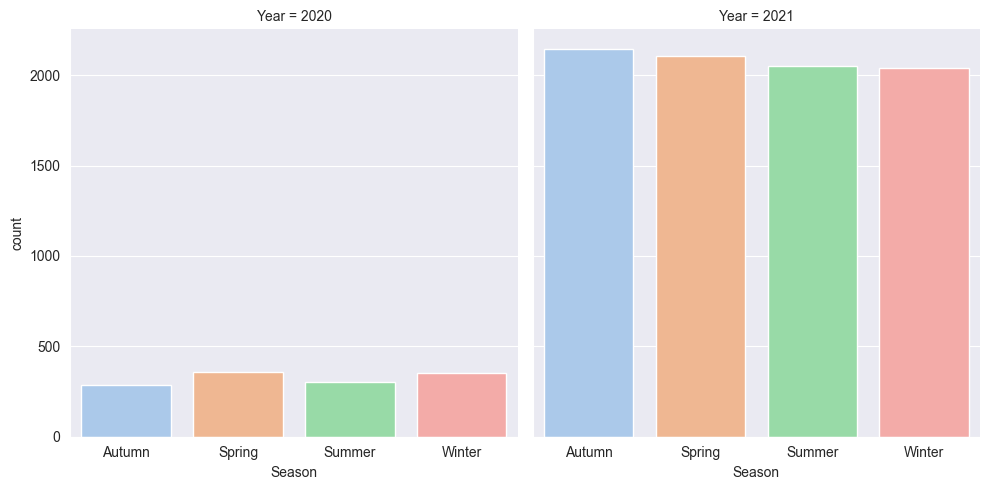

In [11]:
data["Day"] = data['Day'].astype('category')
data['Season'] = data['Season'].astype('category')
data['Year'] = data['Year'].astype('category')

graph = sns.catplot(x = "Season", col = "Year", data = data, kind = "count",hue='Season')
plt.show()

['Southeast' 'South' 'Midwest' 'Northeast' 'West']


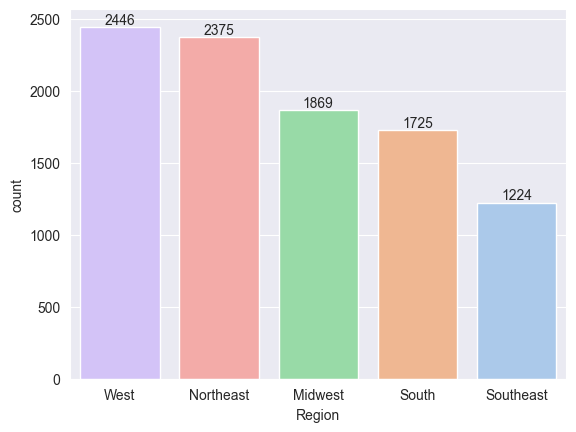

In [12]:
print(data['Region'].unique())
graph = sns.countplot(x = "Region", data = data, order = data.Region.value_counts().index,hue='Region')
for container in graph.containers:
    graph.bar_label(container)
plt.show()

['Florida' 'Louisiana' 'Alabama' 'Missouri' 'Mississippi' 'Wisconsin'
 'New York' 'Michigan' 'Utah' 'Ohio' 'Arkansas' 'Georgia' 'Texas'
 'Oklahoma' 'West Virginia' 'California' 'South Carolina' 'Kansas'
 'Tennessee' 'North Carolina' 'Idaho' 'Indiana' 'New Jersey' 'Oregon'
 'South Dakota' 'North Dakota' 'Iowa' 'Maryland' 'Delaware' 'Washington'
 'Virginia' 'Wyoming' 'Minnesota' 'Kentucky' 'Connecticut' 'Rhode Island'
 'Massachusetts' 'New Mexico' 'Nevada' 'Illinois' 'Nebraska' 'Maine'
 'Arizona' 'Vermont' 'New Hampshire' 'Hawaii' 'Montana' 'Colorado'
 'Pennsylvania' 'Alaska']
No. of states :  50


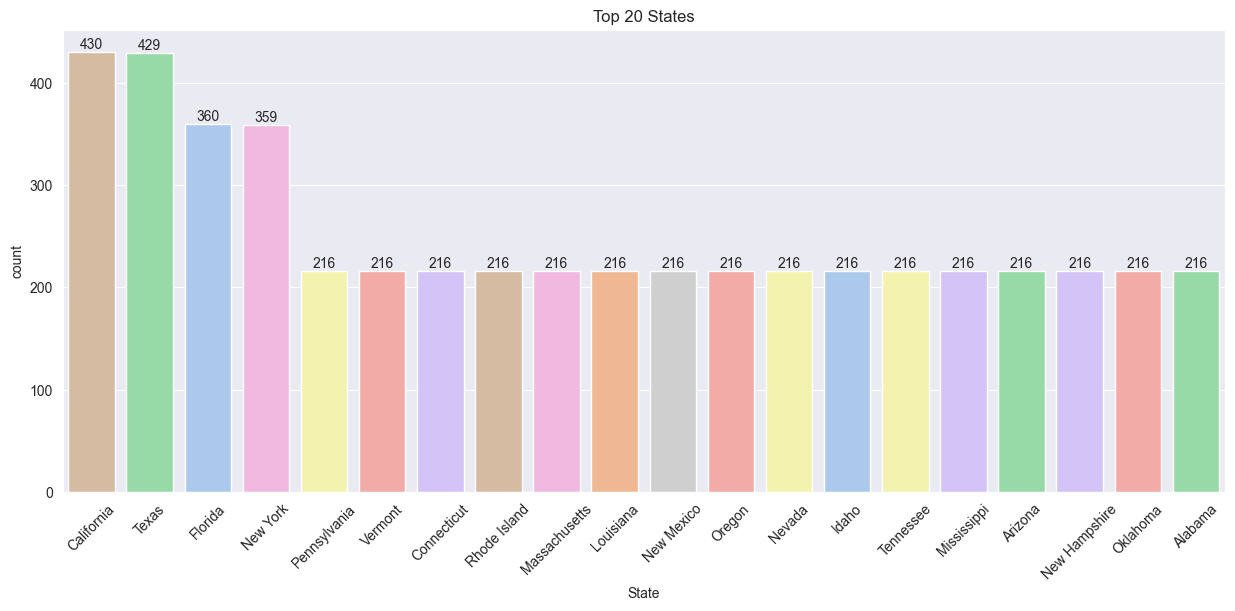

In [13]:
print(data['State'].unique())
print("No. of states : ",data['State'].nunique())
plt.figure(figsize = (15,6))
plt.title('Top 20 States')
graph = sns.countplot(x = "State", data = data, order = data.State.value_counts()[:20].index, palette = "pastel",hue='State')
for container in graph.containers:
    graph.bar_label(container)

plt.xticks(rotation = 45)
plt.show()

['Orlando' 'New Orleans' 'Birmingham' 'St. Louis' 'Jackson' 'Milwaukee'
 'New York' 'Detroit' 'Salt Lake City' 'Columbus' 'Little Rock' 'Atlanta'
 'Houston' 'Oklahoma City' 'Charleston' 'San Francisco' 'Dallas' 'Wichita'
 'Miami' 'Knoxville' 'Los Angeles' 'Charlotte' 'Boise' 'Indianapolis'
 'Newark' 'Portland' 'Sioux Falls' 'Fargo' 'Des Moines' 'Baltimore'
 'Wilmington' 'Seattle' 'Richmond' 'Albany' 'Cheyenne' 'Minneapolis'
 'Louisville' 'Hartford' 'Providence' 'Boston' 'Albuquerque' 'Las Vegas'
 'Chicago' 'Omaha' 'Phoenix' 'Burlington' 'Manchester' 'Honolulu'
 'Billings' 'Denver' 'Philadelphia' 'Anchorage']
No. of cities :  52


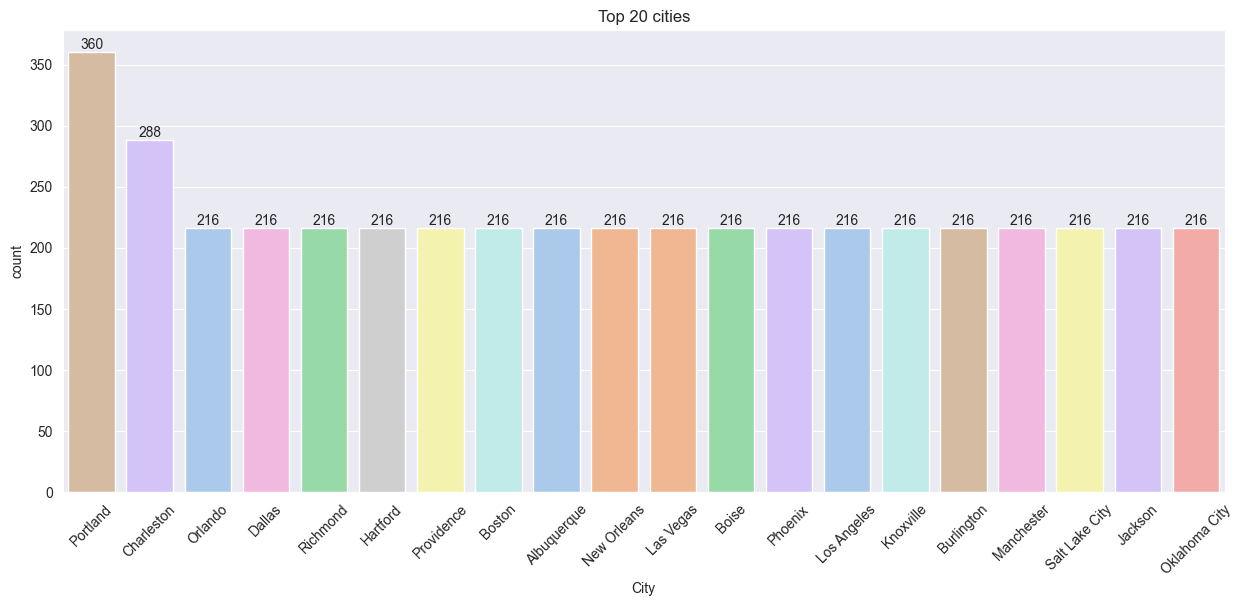

In [14]:
print(data['City'].unique())
print("No. of cities : ",data['City'].nunique())
plt.figure(figsize = (15,6))
plt.title('Top 20 cities')
graph = sns.countplot(x = "City", data = data, order = data.City.value_counts()[:20].index, palette = "pastel",hue='City')
for container in graph.containers:
    graph.bar_label(container)

plt.xticks(rotation = 45)
plt.show()

In [15]:
print("No. of products : ",data['Product'].nunique())
print(data['Product'].unique())

No. of products :  7
["Women's Apparel" "Men's Street Footwear" "Women's Street Footwear"
 "Men's Athletic Footwear" "Women's Athletic Footwear" "Men's Apparel"
 "Men's aparel"]


In [16]:
data['Product'] = data['Product'].replace("Men's aparel", "Men's Apparel")
print("No. of products : ",data['Product'].nunique())
print(data['Product'].unique())

No. of products :  6
["Women's Apparel" "Men's Street Footwear" "Women's Street Footwear"
 "Men's Athletic Footwear" "Women's Athletic Footwear" "Men's Apparel"]


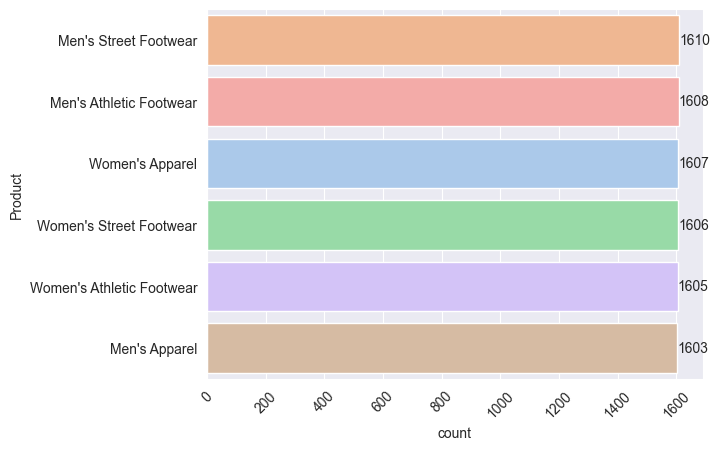

In [17]:
graph = sns.countplot(y = "Product", data = data, order = data.Product.value_counts()[:20].index,hue='Product')
for container in graph.containers:
    graph.bar_label(container)

plt.xticks(rotation = 45)
plt.show()

In [18]:
data['Price per Unit'].unique()

array(['$103.00 ', '$10.00 ', '$15.00 ', '$20.00 ', '$44.00 ', '$48.00 ',
       '$39.00 ', '$46.00 ', '$47.00 ', '$40.00 ', '$33.00 ', '$34.00 ',
       '$31.00 ', '$41.00 ', '$29.00 ', '$56.00 ', '$37.00 ', '$25.00 ',
       '$32.00 ', '$36.00 ', '$43.00 ', '$45.00 ', '$38.00 ', '$26.00 ',
       '$42.00 ', '$35.00 ', '$50.00 ', '$62.00 ', '$58.00 ', '$63.00 ',
       '$53.00 ', '$30.00 ', '$59.00 ', '$54.00 ', '$28.00 ', '$24.00 ',
       '$27.00 ', '$55.00 ', '$61.00 ', '$23.00 ', '$60.00 ', '$64.00 ',
       '$51.00 ', '$52.00 ', '$68.00 ', '$67.00 ', '$86.00 ', '$66.00 ',
       '$49.00 ', '$74.00 ', '$83.00 ', '$69.00 ', '$57.00 ', '$79.00 ',
       '$73.00 ', '$65.00 ', '$22.00 ', '$80.00 ', '$21.00 ', '$12.00 ',
       '$77.00 ', '$72.00 ', '$76.00 ', '$13.00 ', '$70.00 ', '$82.00 ',
       '$19.00 ', '$88.00 ', '$7.00 ', '$14.00 ', '$71.00 ', '$16.00 ',
       '$17.00 ', '$87.00 ', '$18.00 ', '$81.00 ', '$78.00 ', '$9.00 ',
       '$92.00 ', '$85.00 ', '$90.00 ', '$89.00 ', '

In [19]:
def removeDollarSign(price):
    return price.replace('$', '')

In [20]:
data['Price per Unit'] = data['Price per Unit'].apply(removeDollarSign)
data['Price per Unit'] = pd.to_numeric(data['Price per Unit'], errors = 'coerce')
data['Price per Unit'].isna().sum()

0

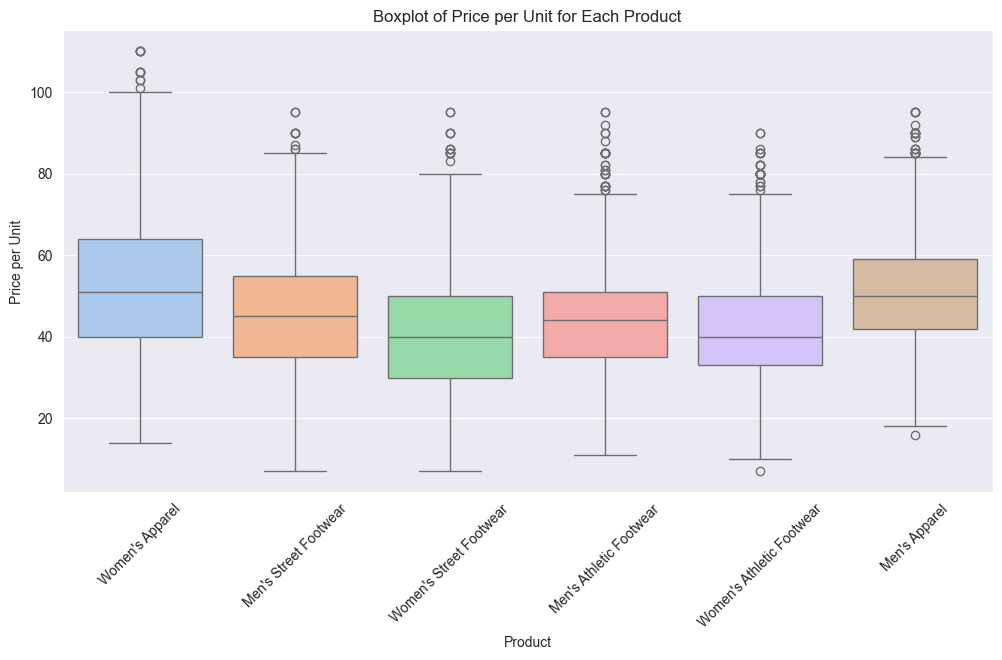

In [21]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Product', y='Price per Unit', data=data,hue='Product')
plt.xticks(rotation=45)
plt.title('Boxplot of Price per Unit for Each Product')
plt.xlabel('Product')
plt.ylabel('Price per Unit')
plt.show()

In [22]:
data['Units Sold'].unique()[-50:]

array(['1,250', '1,220', '1,200', '1,150', '1,125', '1,075', '975', '925',
       '900', '875', '650', '600', '1,100', '1,070', '1,050', '1,045',
       '1,025', '1,020', '1,000', '950', '945', '920', '870', '850',
       '825', '820', '800', '795', '775', '770', '745', '725', '720',
       '695', '675', '670', '645', '625', '620', '595', '570', '550',
       '545', '525', '520', '500', '495', '470', '445', '395'],
      dtype=object)

In [23]:
def replace_comma(Unit):
    return Unit.replace(',', '')

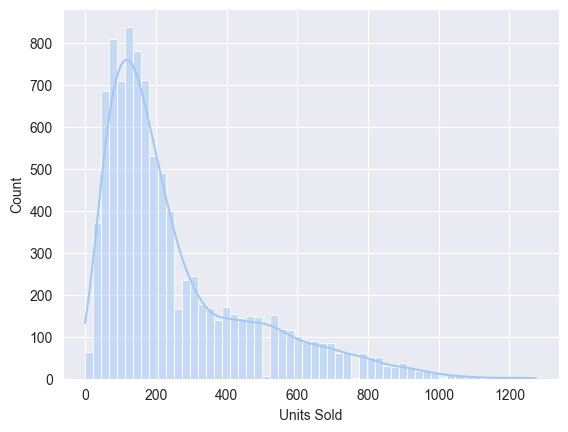

In [24]:
data['Units Sold'] = data['Units Sold'].apply(replace_comma)
data['Units Sold'].unique()[-50:]
data['Units Sold'] = data['Units Sold'].astype('int')
sns.histplot(data = data, x = "Units Sold", kde=True)
plt.show()

In [25]:
data.drop(data[data['Units Sold']==0].index,inplace=True)

In [26]:
data['Total Sales'].unique()

array(['2,245', '1,679', '7,000', ..., '9,900', '11,700', '10,725'],
      dtype=object)

In [27]:
data['Total Sales'] = data['Total Sales'].apply(replace_comma)
data['Total Sales'] = pd.to_numeric(data['Total Sales'], errors = 'coerce', downcast = 'float')
print(data.head())

        Retailer Invoice Date     Region      State         City  \
0        Walmart   2021-06-17  Southeast    Florida      Orlando   
1      West Gear   2021-07-16      South  Louisiana  New Orleans   
2  Sports Direct   2021-08-25      South    Alabama   Birmingham   
3  Sports Direct   2021-08-27      South    Alabama   Birmingham   
4  Sports Direct   2021-08-21      South    Alabama   Birmingham   

                   Product  Price per Unit  Units Sold  Total Sales  \
0          Women's Apparel           103.0         218       2245.0   
1          Women's Apparel           103.0         163       1679.0   
2    Men's Street Footwear            10.0         700       7000.0   
3  Women's Street Footwear            15.0         575       8625.0   
4  Women's Street Footwear            15.0         475       7125.0   

  Operating Profit Sales Method   Month  Year Day  Season  
0          $1,257        Online    June  2021  17  Summer  
1            $806        Online    July  202

In [28]:
data['Total Sales'] = data['Price per Unit'] * data['Units Sold']

In [29]:
data['Operating Profit'].unique()

array(['$1,257 ', '$806 ', '$3,150 ', ..., '$4,290 ', '$7,394 ',
       '$2,925 '], dtype=object)

In [30]:
data['Operating Profit'] = data['Operating Profit'].apply(removeDollarSign)
data['Operating Profit'] = data['Operating Profit'].apply(replace_comma)
data['Operating Profit'] = pd.to_numeric(data['Operating Profit'], errors = 'coerce', downcast = 'float')
data.head()

Retailer Invoice Date     Region      State         City  \
0        Walmart   2021-06-17  Southeast    Florida      Orlando   
1      West Gear   2021-07-16      South  Louisiana  New Orleans   
2  Sports Direct   2021-08-25      South    Alabama   Birmingham   
3  Sports Direct   2021-08-27      South    Alabama   Birmingham   
4  Sports Direct   2021-08-21      South    Alabama   Birmingham   

                   Product  Price per Unit  Units Sold  Total Sales  \
0          Women's Apparel           103.0         218      22454.0   
1          Women's Apparel           103.0         163      16789.0   
2    Men's Street Footwear            10.0         700       7000.0   
3  Women's Street Footwear            15.0         575       8625.0   
4  Women's Street Footwear            15.0         475       7125.0   

   Operating Profit Sales Method   Month  Year Day  Season  
0            1257.0       Online    June  2021  17  Summer  
1             806.0       Online    July  2021  16  Summer  
2            3150.0       Outlet  August  2021  25  Summer  
3            3881.0       Outlet  August  2021  27  Summer  
4            3206.0       Outlet  August  2021  21  Summer

In [31]:
data['profit_percentage'] = (data['Operating Profit'] / data['Total Sales']) * 100
data["profit_percentage"] = data['profit_percentage'].astype('float').round()
data['Operating Profit'] = data['Total Sales'] * (data['profit_percentage'] / 100)

['Online' 'Outlet' 'In-store']


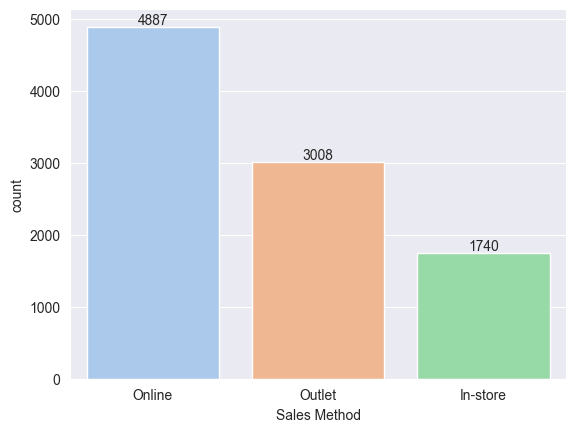

In [32]:
print(data['Sales Method'].unique())
graph = sns.countplot(x = "Sales Method", data = data, order = data['Sales Method'].value_counts().index,hue='Sales Method')
for container in graph.containers:
    graph.bar_label(container)
plt.show()

In [33]:
def groupData(columnName):
    return data.groupby(columnName).agg({'Total Sales' : 'sum', 'Operating Profit' : 'sum'})

               Total Sales  Operating Profit  sales percentage
Retailer                                                      
West Gear       32317808.0        8538727.32         26.948288
Foot Locker     28953945.0        8050783.86         24.143322
Sports Direct   24537997.0        7404925.69         20.461072
Kohl's          13512453.0        3681767.54         11.267394
Walmart         10506085.0        2578229.22          8.760526
Amazon          10096987.0        2881895.36          8.419399


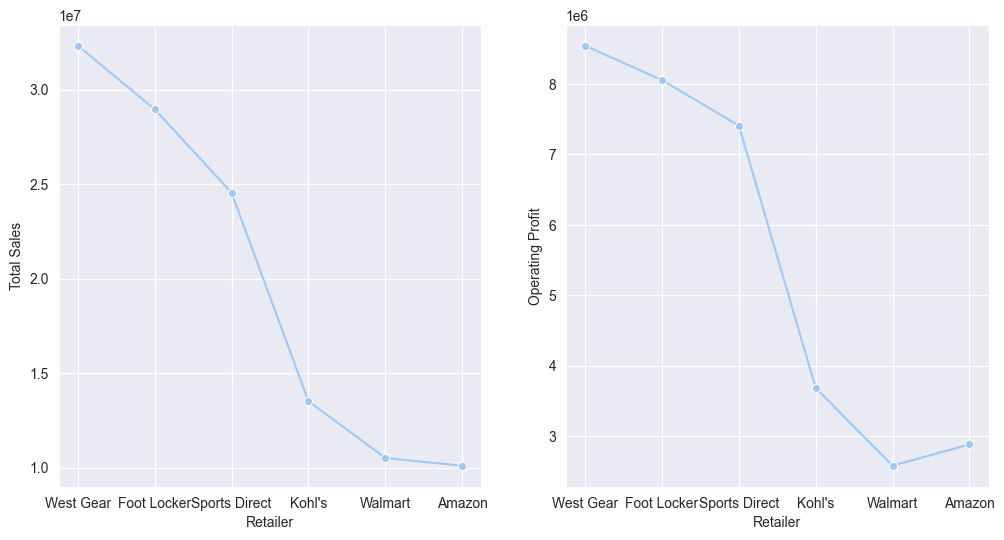

In [34]:
RetailerSales = groupData('Retailer').sort_values(by = 'Total Sales', ascending = False)
RetailerSales['sales percentage'] = (RetailerSales['Total Sales'] / RetailerSales['Total Sales'].sum()) * 100
print(RetailerSales)

plt.figure(figsize = (12,6))

plt.subplot(1, 2, 1)
sns.lineplot(x = RetailerSales.index, y = "Total Sales", data = RetailerSales, marker = "o")

plt.subplot(1, 2, 2)
sns.lineplot(x = RetailerSales.index, y = "Operating Profit", data = RetailerSales, marker='o')

plt.show()

           Total Sales  Operating Profit  sales percentage
Region                                                    
West        36344407.0        8934502.87              30.0
Northeast   25027267.0        6786609.39              21.0
Southeast   21374436.0        6055068.37              18.0
South       20524731.0        6086846.89              17.0
Midwest     16654434.0        5273301.47              14.0


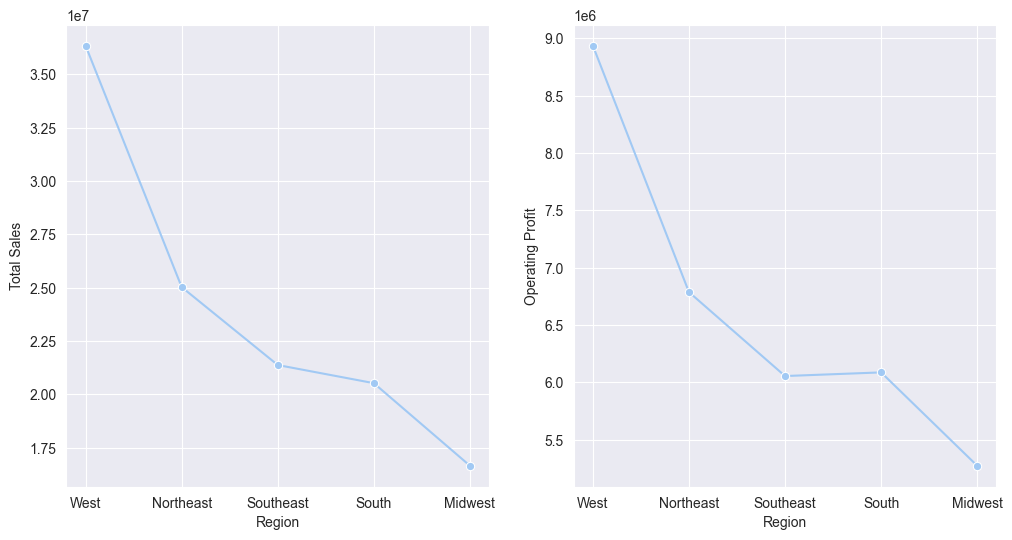

In [35]:
RegionSales = groupData('Region').sort_values(by = 'Total Sales', ascending = False)
RegionSales['sales percentage'] = ((RegionSales['Total Sales'] / RegionSales['Total Sales'].sum()) * 100).round()
print(RegionSales)

plt.figure(figsize = (12,6))

plt.subplot(1, 2, 1)
sns.lineplot(x = RegionSales.index, y = "Total Sales", data = RegionSales, marker = "o")


plt.subplot(1, 2, 2)
sns.lineplot(x = RegionSales.index, y = "Operating Profit", data = RegionSales, marker='o')

plt.show()

                           Total Sales  Operating Profit  sales percentage
Product                                                                   
Men's Street Footwear       27680769.0        8279857.85              23.0
Women's Apparel             23814985.0        6855165.38              20.0
Men's Athletic Footwear     20532180.0        5169630.83              17.0
Women's Street Footwear     17171938.0        4499819.96              14.0
Men's Apparel               16413882.0        4436921.60              14.0
Women's Athletic Footwear   14311521.0        3894933.37              12.0


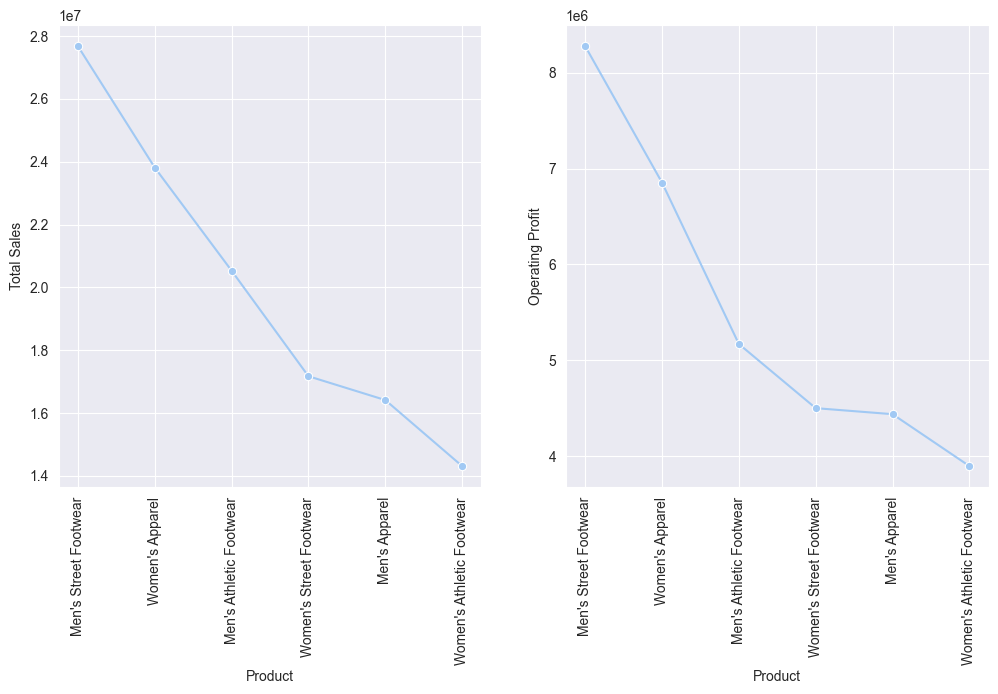

In [36]:
ProductSales = groupData('Product').sort_values(by = 'Total Sales', ascending = False)
ProductSales['sales percentage'] = ((ProductSales['Total Sales'] / ProductSales['Total Sales'].sum()) * 100).round()
print(ProductSales)

plt.figure(figsize = (12,6))

plt.subplot(1, 2, 1)
sns.lineplot(x = ProductSales.index, y = "Total Sales", data = ProductSales, marker = "o")
plt.xticks(rotation = 90)


plt.subplot(1, 2, 2)
sns.lineplot(x = ProductSales.index, y = "Operating Profit", data = ProductSales, marker='o')
plt.xticks(rotation = 90)

plt.show()

C:\Users\Tanaz\AppData\Local\Temp\ipykernel_39892\918680813.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return data.groupby(columnName).agg({'Total Sales' : 'sum', 'Operating Profit' : 'sum'})


        Total Sales  Operating Profit  sales percentage
Season                                                 
Summer   34548167.0        9487188.20              29.0
Winter   29281202.0        7769349.34              24.0
Spring   28128124.0        7795083.87              23.0
Autumn   27967782.0        8084707.58              23.0


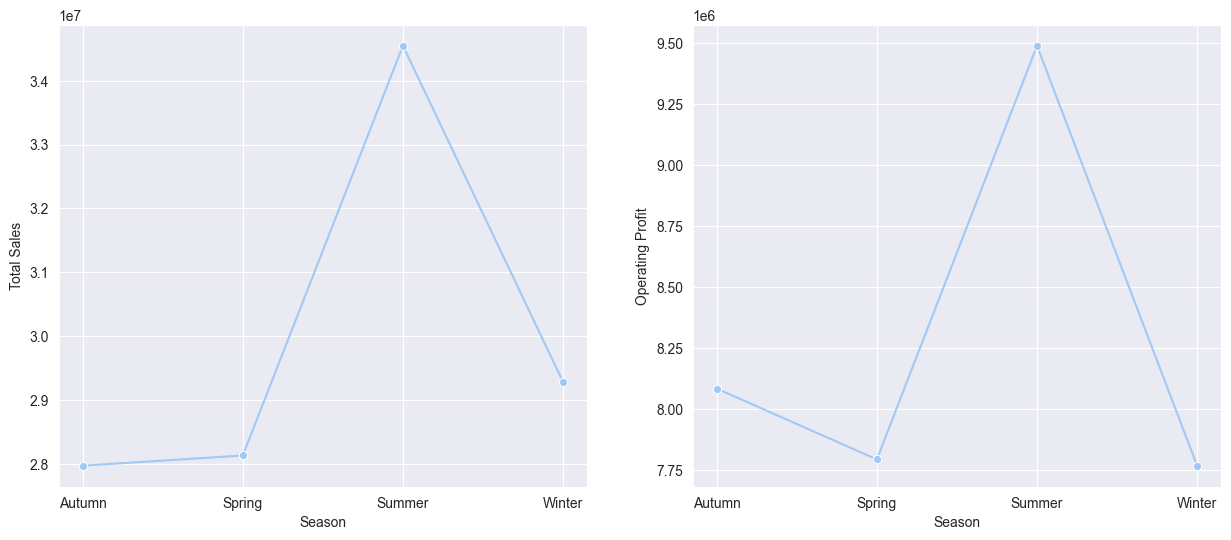

In [37]:
SeasonSales = groupData('Season').sort_values(by = 'Total Sales', ascending = False)
SeasonSales['sales percentage'] = ((SeasonSales['Total Sales'] / SeasonSales['Total Sales'].sum()) * 100).round()
print(SeasonSales)
plt.figure(figsize = (15,6))

plt.subplot(1, 2, 1)
sns.lineplot(x = SeasonSales.index, y = "Total Sales", data = SeasonSales, marker = "o")


plt.subplot(1, 2, 2)
sns.lineplot(x = SeasonSales.index, y = "Operating Profit", data = SeasonSales, marker='o')

plt.show()

              Total Sales  Operating Profit  sales percentage
Sales Method                                                 
Online         44965657.0        9654253.77              37.0
Outlet         39295243.0       10722946.47              33.0
In-store       35664375.0       12759128.75              30.0


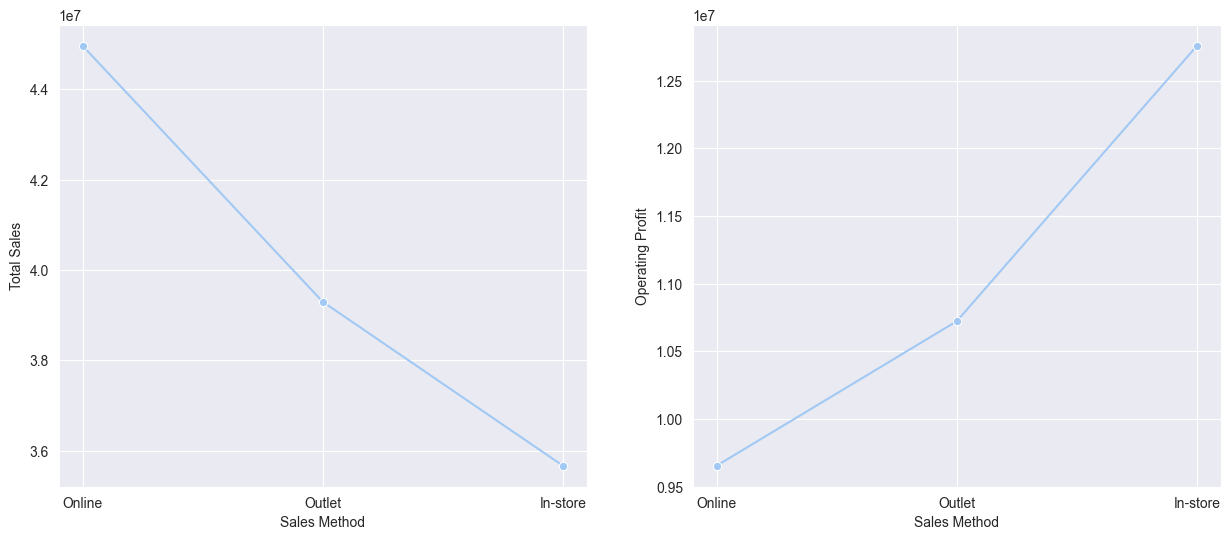

In [38]:
SalesMethod = groupData('Sales Method').sort_values(by = 'Total Sales', ascending = False)
SalesMethod['sales percentage'] = ((SalesMethod['Total Sales'] / SalesMethod['Total Sales'].sum()) * 100).round()
print(SalesMethod)

plt.figure(figsize = (15,6))

plt.subplot(1, 2, 1)
sns.lineplot(x = SalesMethod.index, y = "Total Sales", data = SalesMethod, marker = "o")

plt.subplot(1, 2, 2)
sns.lineplot(x = SalesMethod.index, y = "Operating Profit", data = SalesMethod, marker='o')

plt.show()


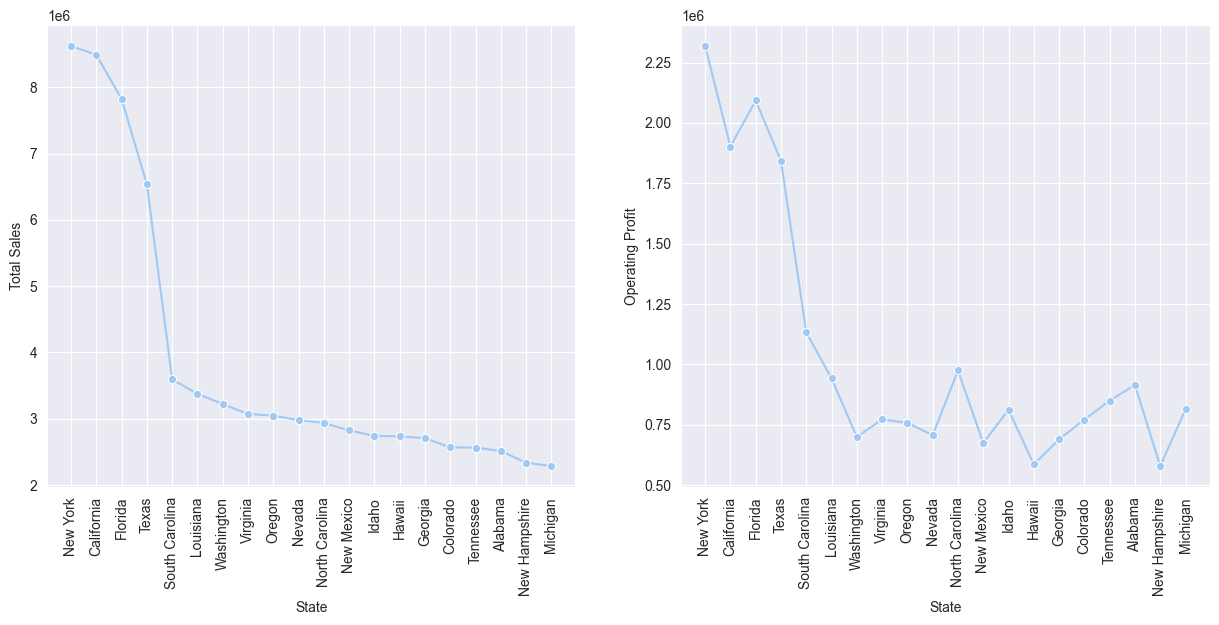

In [39]:
stateSales = groupData('State').sort_values(by = 'Total Sales', ascending = False)[:20]

plt.figure(figsize = (15,6))

plt.subplot(1, 2, 1)
sns.lineplot(x = stateSales.index, y = "Total Sales", data = stateSales, marker = "o")
plt.xticks(rotation = 90)

plt.subplot(1, 2, 2)
sns.lineplot(x = stateSales.index, y = "Operating Profit", data = stateSales, marker='o')
plt.xticks(rotation = 90)

plt.show()

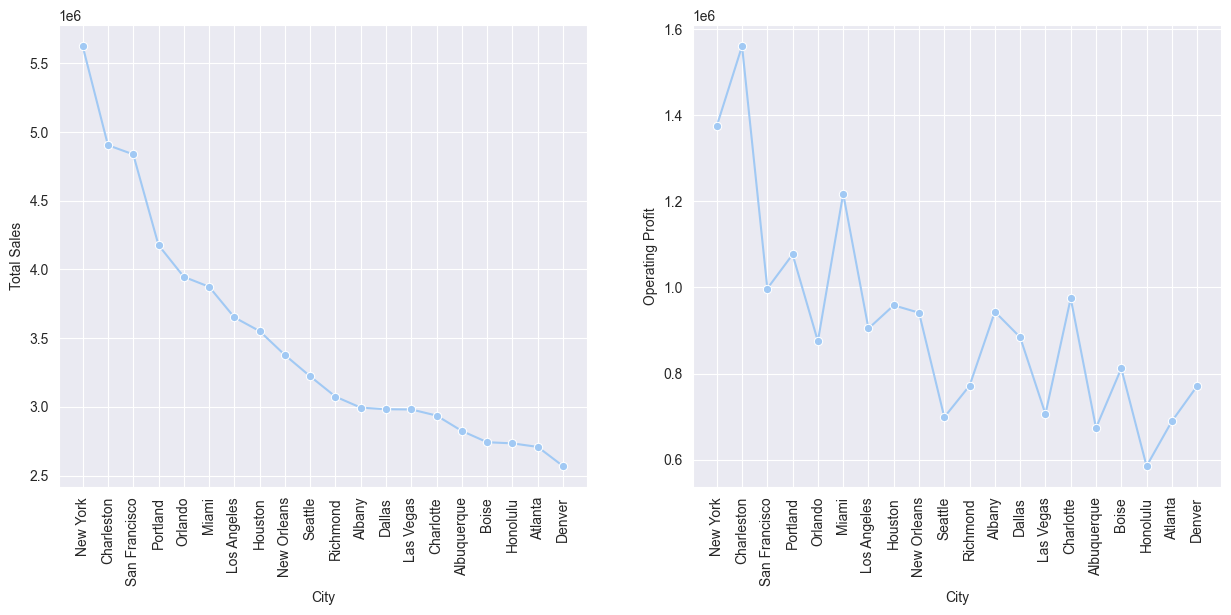

In [40]:
citySales = groupData('City').sort_values(by = 'Total Sales', ascending = False)[:20]

plt.figure(figsize = (15,6))

plt.subplot(1, 2, 1)
sns.lineplot(x = citySales.index, y = "Total Sales", data = citySales, marker = "o")
plt.xticks(rotation = 90)

plt.subplot(1, 2, 2)
sns.lineplot(x = citySales.index, y = "Operating Profit", data = citySales, marker='o')
plt.xticks(rotation = 90)

plt.show()

C:\Users\Tanaz\AppData\Local\Temp\ipykernel_39892\26172814.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonSales = data.groupby(['Season', 'Product'])['Units Sold'].sum().reset_index().sort_values(by = 'Units Sold', ascending = False)


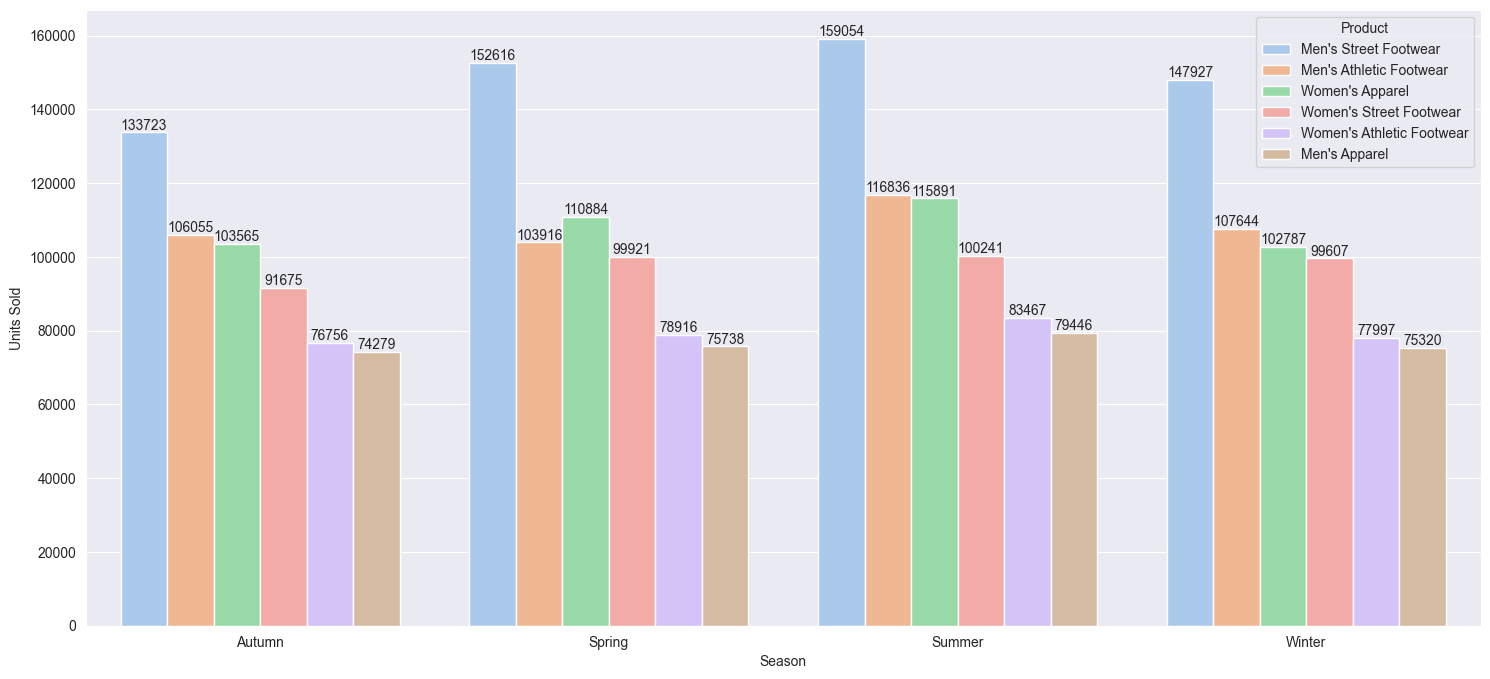

In [41]:
seasonSales = data.groupby(['Season', 'Product'])['Units Sold'].sum().reset_index().sort_values(by = 'Units Sold', ascending = False)

plt.figure(figsize = (18,8))
graph = sns.barplot(x = "Season", y = "Units Sold", hue = 'Product', data = seasonSales)
for container in graph.containers:
    graph.bar_label(container)

plt.show()

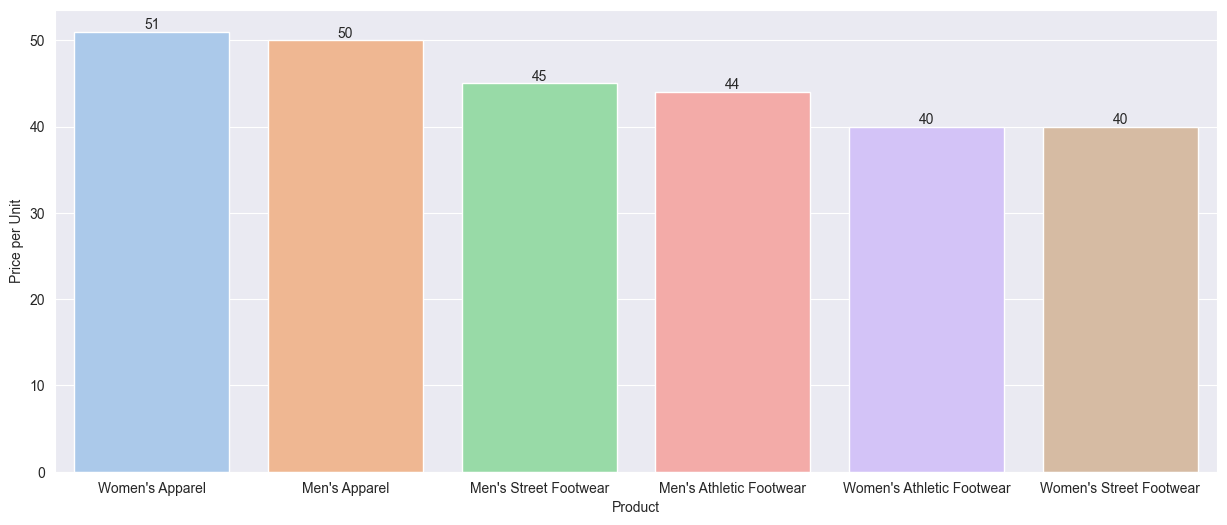

In [42]:
productsPerUnit = data.groupby('Product')['Price per Unit'].median().reset_index().sort_values(by = 'Price per Unit', ascending = False)

plt.figure(figsize = (15,6))
graph = sns.barplot(x = 'Product', y = 'Price per Unit', data = productsPerUnit,hue='Product')

for container in graph.containers:
    graph.bar_label(container)

plt.show()

C:\Users\Tanaz\AppData\Local\Temp\ipykernel_39892\4198313049.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonSalesMethod = data.groupby(['Season', 'Sales Method']).agg(Count = ('Sales Method', 'count'))


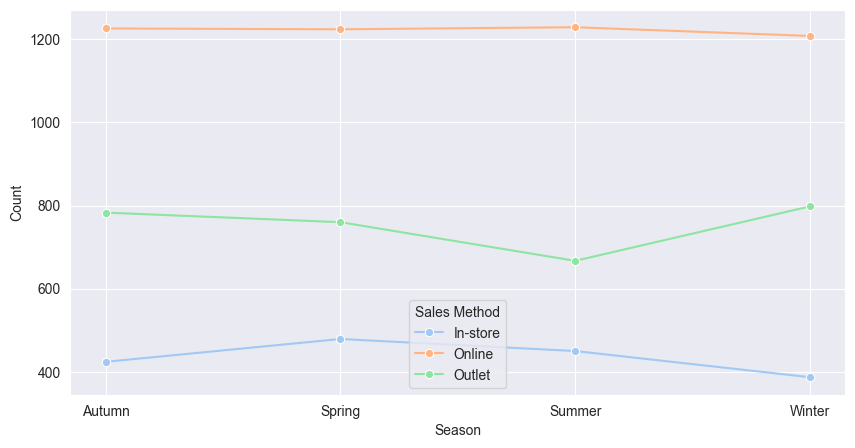

In [43]:
seasonSalesMethod = data.groupby(['Season', 'Sales Method']).agg(Count = ('Sales Method', 'count'))

plt.figure(figsize = (10,5))
sns.lineplot(x = "Season", y = "Count", hue = 'Sales Method', data = seasonSalesMethod, marker='o')

plt.show()

In [44]:
data['Retailer'].unique()

array(['Walmart', 'West Gear', 'Sports Direct', 'Foot Locker', 'Amazon',
       "Kohl's"], dtype=object)

In [45]:
retailer_dfs = {}
for retailer in data['Retailer'].unique():
    retailer_dfs[retailer] = data[data['Retailer'] == retailer].copy()
print(retailer_dfs["Walmart"])

     Retailer Invoice Date     Region        State         City  \
0     Walmart   2021-06-17  Southeast      Florida      Orlando   
15    Walmart   2021-09-16      South  Mississippi      Jackson   
16    Walmart   2021-02-21      South     Arkansas  Little Rock   
17    Walmart   2021-10-21      South     Arkansas  Little Rock   
18    Walmart   2020-05-03  Northeast     New York     New York   
...       ...          ...        ...          ...          ...   
9347  Walmart   2021-10-10       West       Hawaii     Honolulu   
9348  Walmart   2021-09-18  Southeast      Florida      Orlando   
9373  Walmart   2021-04-20      South     Arkansas  Little Rock   
9465  Walmart   2021-05-18  Southeast      Florida      Orlando   
9550  Walmart   2021-04-17  Southeast      Florida      Orlando   

                        Product  Price per Unit  Units Sold  Total Sales  \
0               Women's Apparel           103.0         218      22454.0   
15      Women's Street Footwear            

In [46]:
for retailer, df in retailer_dfs.items():
   other_retailers_df = data[data['Retailer'] != retailer]
   competitor_prices_daily = other_retailers_df.groupby(['Invoice Date', 'Product'])['Price per Unit'].mean()
   df['Competitor Price'] = df.set_index(['Invoice Date', 'Product']).index.map(competitor_prices_daily)
   df['Competitor Price'] = df.groupby('Product')['Competitor Price'].ffill()
   df['Competitor Price'] = df.groupby('Product')['Competitor Price'].bfill()
   retailer_dfs[retailer] = df
for retailer, df in retailer_dfs.items():
    print(f"Retailer: {retailer}")
    print(df[['Invoice Date', 'Product', 'Price per Unit', 'Competitor Price']].head())


Retailer: Walmart
   Invoice Date                  Product  Price per Unit  Competitor Price
0    2021-06-17          Women's Apparel           103.0         70.444444
15   2021-09-16  Women's Street Footwear            20.0          8.666667
16   2021-02-21          Women's Apparel            20.0         17.333333
17   2021-10-21  Men's Athletic Footwear            20.0         17.666667
18   2020-05-03    Men's Street Footwear            48.0         44.000000
Retailer: West Gear
   Invoice Date                  Product  Price per Unit  Competitor Price
1    2021-07-16          Women's Apparel           103.0         76.833333
5    2021-01-11  Women's Street Footwear            15.0         43.500000
8    2021-04-03    Men's Street Footwear            20.0         19.600000
11   2021-02-11  Women's Street Footwear            15.0         24.000000
12   2021-06-11  Women's Street Footwear            20.0         49.500000
Retailer: Sports Direct
  Invoice Date                  Produc

In [47]:
for retailer, df in retailer_dfs.items():
    df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])
    df['Week'] = df['Invoice Date'].dt.isocalendar().week
    df.sort_values(by=['Product', 'Year', 'Week', 'Invoice Date'], inplace=True)
    df['lag_price'] = df.groupby(['Product', 'Year', 'Week'], observed=False)['Price per Unit'].shift(1)
    df['lag_price'] = df['lag_price'].fillna(df['Price per Unit'])
    retailer_dfs[retailer] = df


for retailer, df in retailer_dfs.items():
    print(f"Retailer: {retailer}")
    print(df[['Invoice Date', 'Year', 'Week', 'Product', 'Price per Unit', 'lag_price']].head())


Retailer: Walmart
     Invoice Date  Year  Week        Product  Price per Unit  lag_price
260    2020-04-17  2020    16  Men's Apparel            43.0       43.0
332    2020-04-17  2020    16  Men's Apparel            54.0       43.0
6669   2020-04-17  2020    16  Men's Apparel            60.0       54.0
129    2020-04-23  2020    17  Men's Apparel            44.0       44.0
459    2020-04-23  2020    17  Men's Apparel            58.0       44.0
Retailer: West Gear
     Invoice Date  Year  Week        Product  Price per Unit  lag_price
5030   2020-01-06  2020     2  Men's Apparel            37.0       37.0
5351   2020-01-06  2020     2  Men's Apparel            47.0       37.0
9329   2020-01-06  2020     2  Men's Apparel            50.0       47.0
5370   2020-01-12  2020     2  Men's Apparel            37.0       50.0
5908   2020-01-12  2020     2  Men's Apparel            46.0       37.0
Retailer: Sports Direct
     Invoice Date  Year  Week        Product  Price per Unit  lag_price
17

In [48]:
for retailer, df in retailer_dfs.items():
    df.sort_values(by=['Product', 'Year', 'Week', 'Invoice Date'], inplace=True)
    df['lag_avg_price'] = df.groupby(['Product', 'Year', 'Week'],observed=True)['Price per Unit'].transform(
        lambda x: x.shift(1).mean())
    df['lag_avg_price'] = df['lag_avg_price'].fillna(df['Price per Unit'])
    retailer_dfs[retailer] = df
for retailer, df in retailer_dfs.items():
    print(f"Retailer: {retailer}")
    print(df[['Invoice Date', 'Year', 'Week', 'Product', 'Price per Unit', 'lag_price', 'lag_avg_price']].head())


Retailer: Walmart
     Invoice Date  Year  Week        Product  Price per Unit  lag_price  \
260    2020-04-17  2020    16  Men's Apparel            43.0       43.0   
332    2020-04-17  2020    16  Men's Apparel            54.0       43.0   
6669   2020-04-17  2020    16  Men's Apparel            60.0       54.0   
129    2020-04-23  2020    17  Men's Apparel            44.0       44.0   
459    2020-04-23  2020    17  Men's Apparel            58.0       44.0   

      lag_avg_price  
260            48.5  
332            48.5  
6669           48.5  
129            55.4  
459            55.4  
Retailer: West Gear
     Invoice Date  Year  Week        Product  Price per Unit  lag_price  \
5030   2020-01-06  2020     2  Men's Apparel            37.0       37.0   
5351   2020-01-06  2020     2  Men's Apparel            47.0       37.0   
9329   2020-01-06  2020     2  Men's Apparel            50.0       47.0   
5370   2020-01-12  2020     2  Men's Apparel            37.0       50.0   
5908

In [49]:
for retailer, df in retailer_dfs.items():
    grouped = df.groupby(['Product', 'Invoice Date']).agg(
        Total_Quantity=('Units Sold', 'sum'),
        Average_Price=('Price per Unit', 'mean')
    ).reset_index()
    grouped['Previous_Quantity'] = grouped.groupby('Product')['Total_Quantity'].shift(1)
    grouped['Previous_Price'] = grouped.groupby('Product')['Average_Price'].shift(1)
    grouped['Quantity_Change'] = grouped['Total_Quantity'] - grouped['Previous_Quantity']
    grouped['Price_Change'] = grouped['Average_Price'] - grouped['Previous_Price']
    grouped['Price_Change'] = grouped['Price_Change'].replace(0, 0.001)

    grouped['E_d'] = (
        (grouped['Quantity_Change'] / grouped['Previous_Quantity']) /
        (grouped['Price_Change'] / grouped['Previous_Price'])
    )
    grouped['E_d'] = grouped['E_d'].fillna(grouped['Total_Quantity'] / grouped['Average_Price'])
    df = df.merge(grouped[['Product', 'Invoice Date', 'E_d']], on=['Product', 'Invoice Date'], how='left')
    retailer_dfs[retailer] = df

for retailer, df in retailer_dfs.items():
    print(f"Retailer: {retailer}")
    print(df[['Invoice Date', 'Product', 'Price per Unit', 'E_d']].head())


Retailer: Walmart
  Invoice Date        Product  Price per Unit        E_d
0   2020-04-17  Men's Apparel            43.0  27.687898
1   2020-04-17  Men's Apparel            54.0  27.687898
2   2020-04-17  Men's Apparel            60.0  27.687898
3   2020-04-23  Men's Apparel            44.0   0.390062
4   2020-04-23  Men's Apparel            58.0   0.390062
Retailer: West Gear
  Invoice Date        Product  Price per Unit        E_d
0   2020-01-06  Men's Apparel            37.0   8.955224
1   2020-01-06  Men's Apparel            47.0   8.955224
2   2020-01-06  Men's Apparel            50.0   8.955224
3   2020-01-12  Men's Apparel            37.0  26.130000
4   2020-01-12  Men's Apparel            46.0  26.130000
Retailer: Sports Direct
  Invoice Date        Product  Price per Unit        E_d
0   2020-07-23  Men's Apparel            26.0  25.882353
1   2020-07-23  Men's Apparel            36.0  25.882353
2   2020-07-23  Men's Apparel            40.0  25.882353
3   2020-07-29  Men's Appa

In [50]:
print(retailer_dfs["Amazon"].head())

  Retailer Invoice Date     Region           State       City        Product  \
0   Amazon   2021-01-13  Southeast  North Carolina  Charlotte  Men's Apparel   
1   Amazon   2021-01-13  Southeast  North Carolina  Charlotte  Men's Apparel   
2   Amazon   2021-01-14  Northeast   Massachusetts     Boston  Men's Apparel   
3   Amazon   2021-01-14  Northeast   Massachusetts     Boston  Men's Apparel   
4   Amazon   2021-01-14  Northeast   Massachusetts     Boston  Men's Apparel   

   Price per Unit  Units Sold  Total Sales  Operating Profit  ...    Month  \
0            44.0         128       5632.0            281.60  ...  January   
1            45.0         475      21375.0           7481.25  ...  January   
2            37.0          70       2590.0            103.60  ...  January   
3            52.0          68       3536.0            176.80  ...  January   
4            55.0         225      12375.0           4331.25  ...  January   

   Year Day  Season profit_percentage  Competitor 

In [51]:
for retailer,df in retailer_dfs.items():
  x = df[['Units Sold','Total Sales', 'Operating Profit', 'profit_percentage','Competitor Price','lag_avg_price','E_d']]
  print(x.corr())

                   Units Sold  Total Sales  Operating Profit  \
Units Sold           1.000000     0.907146          0.902096   
Total Sales          0.907146     1.000000          0.925295   
Operating Profit     0.902096     0.925295          1.000000   
profit_percentage    0.776996     0.665490          0.815640   
Competitor Price     0.112373     0.281180          0.178073   
lag_avg_price        0.093510     0.363080          0.189940   
E_d                 -0.031182    -0.009263         -0.007884   

                   profit_percentage  Competitor Price  lag_avg_price  \
Units Sold                  0.776996          0.112373       0.093510   
Total Sales                 0.665490          0.281180       0.363080   
Operating Profit            0.815640          0.178073       0.189940   
profit_percentage           1.000000          0.007601      -0.040002   
Competitor Price            0.007601          1.000000       0.624650   
lag_avg_price              -0.040002          0.6

In [52]:
for retailer,df in retailer_dfs.items():
  x = df[[ 'Operating Profit', 'Competitor Price','lag_avg_price','E_d']]
  print(x.corr())

                  Operating Profit  Competitor Price  lag_avg_price       E_d
Operating Profit          1.000000          0.178073        0.18994 -0.007884
Competitor Price          0.178073          1.000000        0.62465  0.059824
lag_avg_price             0.189940          0.624650        1.00000  0.047370
E_d                      -0.007884          0.059824        0.04737  1.000000
                  Operating Profit  Competitor Price  lag_avg_price       E_d
Operating Profit          1.000000          0.148236       0.250414  0.001477
Competitor Price          0.148236          1.000000       0.444381 -0.003848
lag_avg_price             0.250414          0.444381       1.000000  0.021920
E_d                       0.001477         -0.003848       0.021920  1.000000
                  Operating Profit  Competitor Price  lag_avg_price       E_d
Operating Profit          1.000000          0.065523       0.181519 -0.032717
Competitor Price          0.065523          1.000000       0.259

In [53]:
from sklearn.preprocessing import MinMaxScaler

for retailer, df in retailer_dfs.items():
    cols_to_normalize = ['Operating Profit', 'Competitor Price', 'lag_avg_price', 'E_d']
    scaler = MinMaxScaler()
    df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])
    retailer_dfs[retailer] = df
print(retailer_dfs["Amazon"].head())

  Retailer Invoice Date     Region           State       City        Product  \
0   Amazon   2021-01-13  Southeast  North Carolina  Charlotte  Men's Apparel   
1   Amazon   2021-01-13  Southeast  North Carolina  Charlotte  Men's Apparel   
2   Amazon   2021-01-14  Northeast   Massachusetts     Boston  Men's Apparel   
3   Amazon   2021-01-14  Northeast   Massachusetts     Boston  Men's Apparel   
4   Amazon   2021-01-14  Northeast   Massachusetts     Boston  Men's Apparel   

   Price per Unit  Units Sold  Total Sales  Operating Profit  ...    Month  \
0            44.0         128       5632.0          0.009122  ...  January   
1            45.0         475      21375.0          0.256994  ...  January   
2            37.0          70       2590.0          0.002994  ...  January   
3            52.0          68       3536.0          0.005514  ...  January   
4            55.0         225      12375.0          0.148545  ...  January   

   Year Day  Season profit_percentage  Competitor 

In [54]:

categorical_var=["Region","State","City","Product","Year","Season","Sales Method"]
for retailer, df in retailer_dfs.items():
      df=pd.get_dummies(df,columns=categorical_var)
      retailer_dfs[retailer] = df


for retailer,df in retailer_dfs.items():
  print(retailer)
  print(df)
  print()

Walmart
    Retailer Invoice Date  Price per Unit  Units Sold  Total Sales  \
0    Walmart   2020-04-17            43.0         279      11997.0   
1    Walmart   2020-04-17            54.0         270      14580.0   
2    Walmart   2020-04-17            60.0         900      54000.0   
3    Walmart   2020-04-23            44.0         315      13860.0   
4    Walmart   2020-04-23            58.0         252      14616.0   
..       ...          ...             ...         ...          ...   
621  Walmart   2021-11-10            50.0         123       6150.0   
622  Walmart   2021-11-10            55.0         425      23375.0   
623  Walmart   2021-11-17            44.0         173       7612.0   
624  Walmart   2021-11-17            53.0         147       7791.0   
625  Walmart   2021-11-17            55.0         525      28875.0   

     Operating Profit     Month Day  profit_percentage  Competitor Price  ...  \
0            0.008317     April  17                3.0          0.1919

In [59]:
for retailer,df in retailer_dfs.items():
    name=retailer+'.csv'
    df.to_csv(name, index=False)

Retailer: Walmart
Mean Squared Error: 20.415455555555553
R-squared: 0.9402309741176383


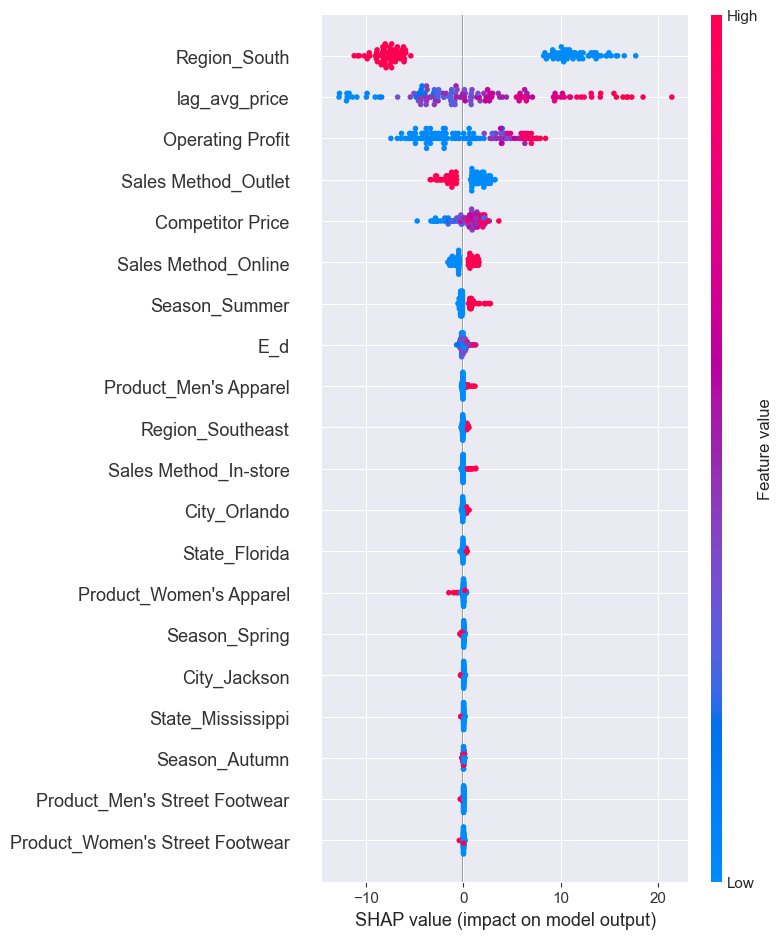

<Figure size 640x480 with 0 Axes>

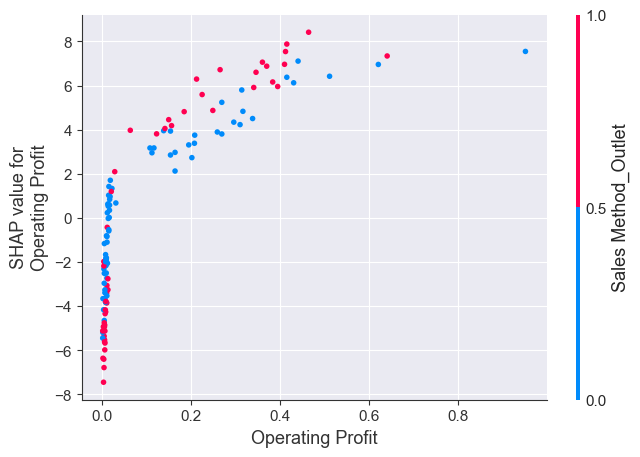

Retailer: West Gear
Mean Squared Error: 29.254997263157893
R-squared: 0.9040207824070203


<Figure size 640x480 with 0 Axes>

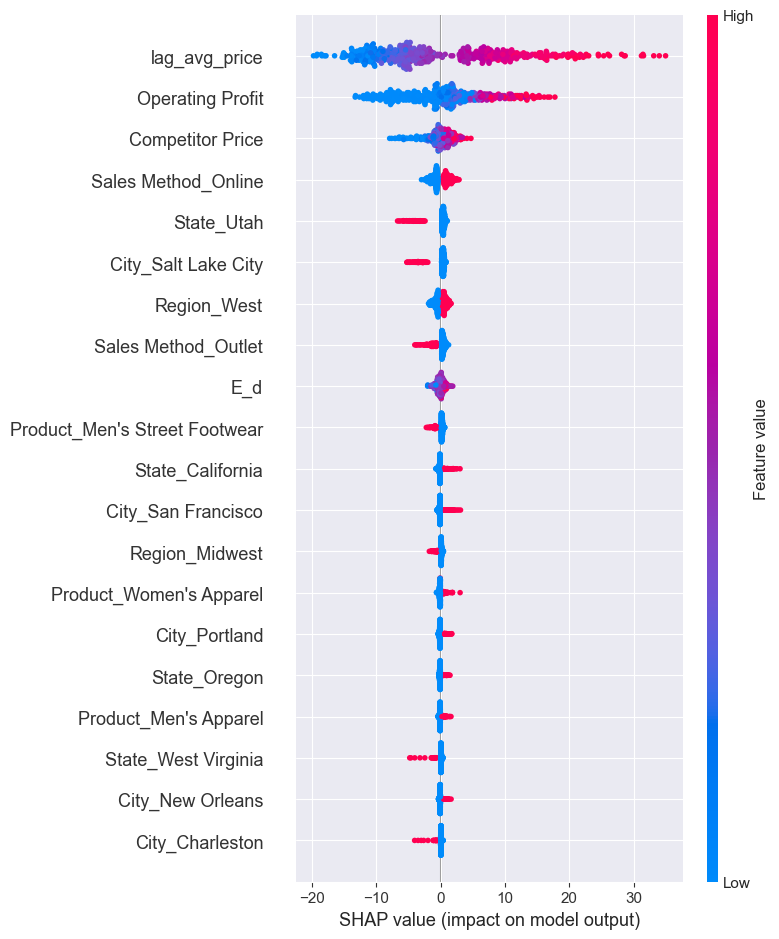

<Figure size 640x480 with 0 Axes>

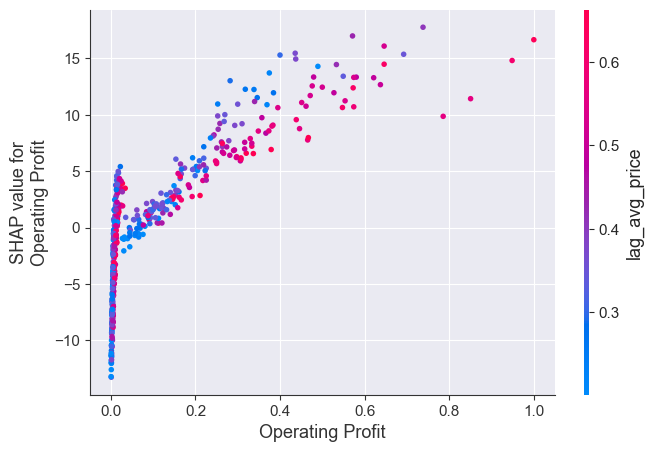

Retailer: Sports Direct
Mean Squared Error: 25.932507142857144
R-squared: 0.8532311806904826


<Figure size 640x480 with 0 Axes>

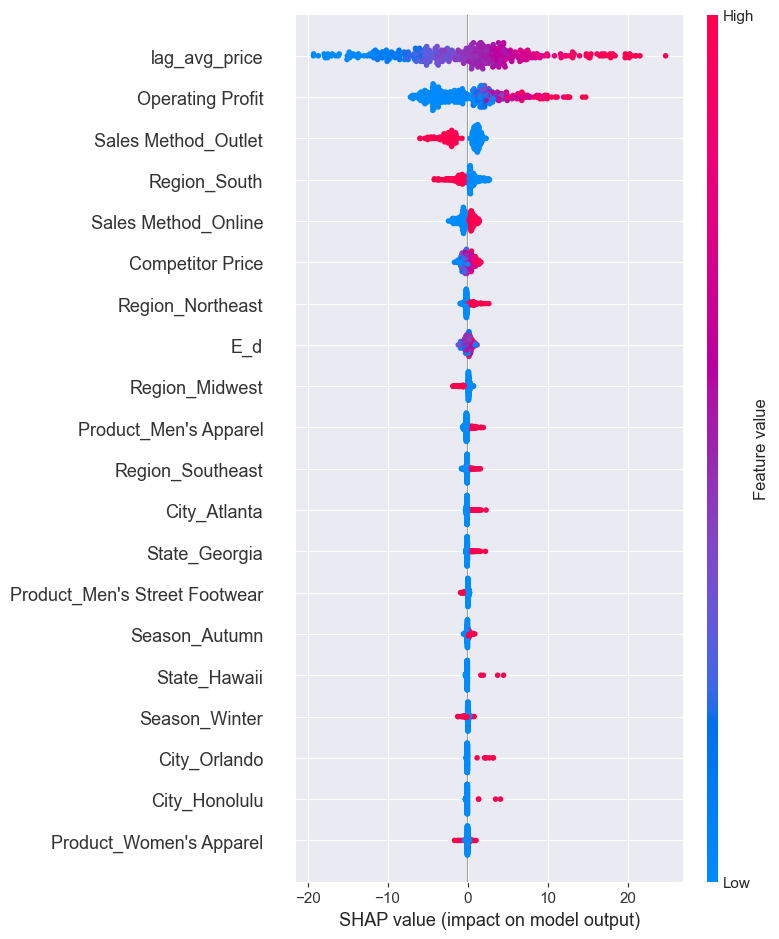

<Figure size 640x480 with 0 Axes>

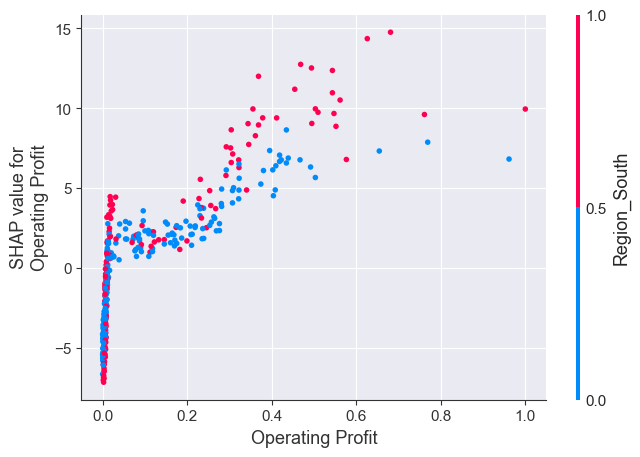

Retailer: Foot Locker
Mean Squared Error: 23.382653231939162
R-squared: 0.8724576885112579


<Figure size 640x480 with 0 Axes>

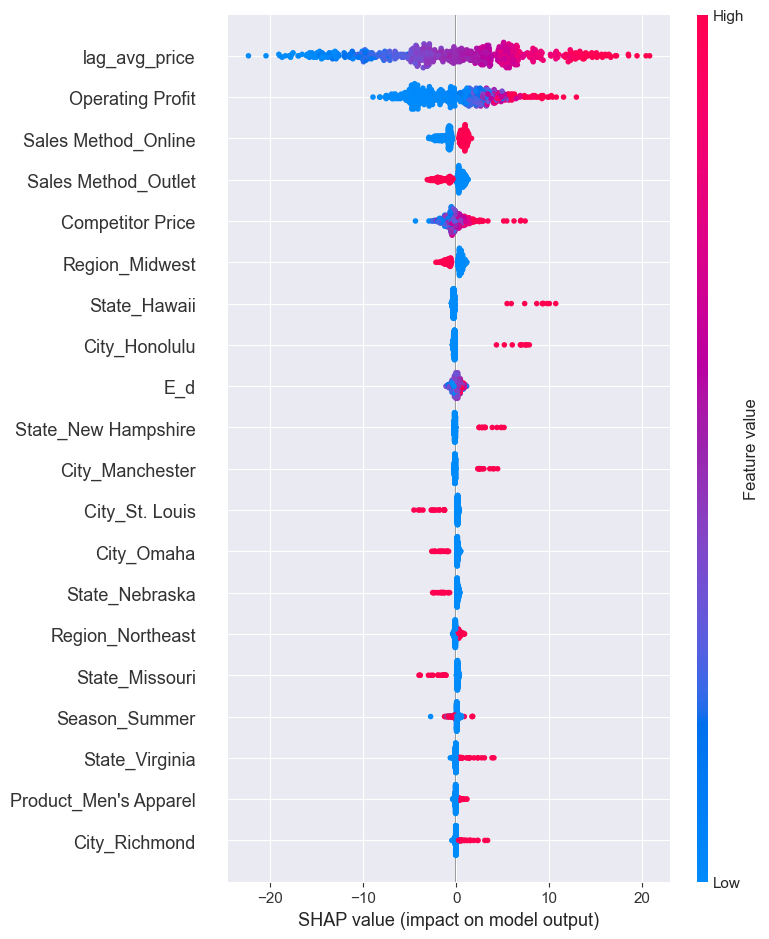

<Figure size 640x480 with 0 Axes>

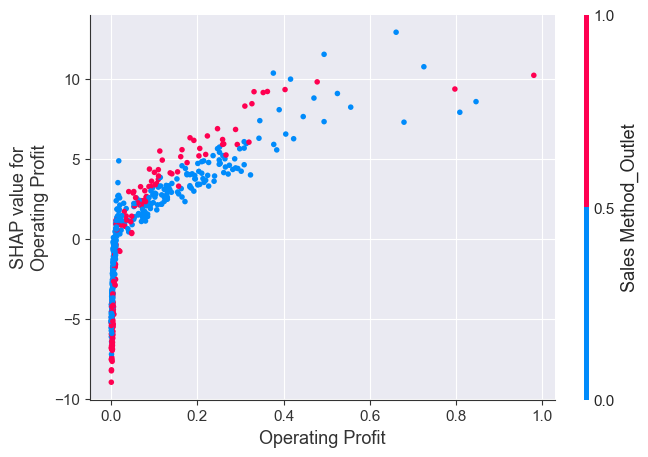

Retailer: Amazon
Mean Squared Error: 14.538689999999999
R-squared: 0.8898120696691885


<Figure size 640x480 with 0 Axes>

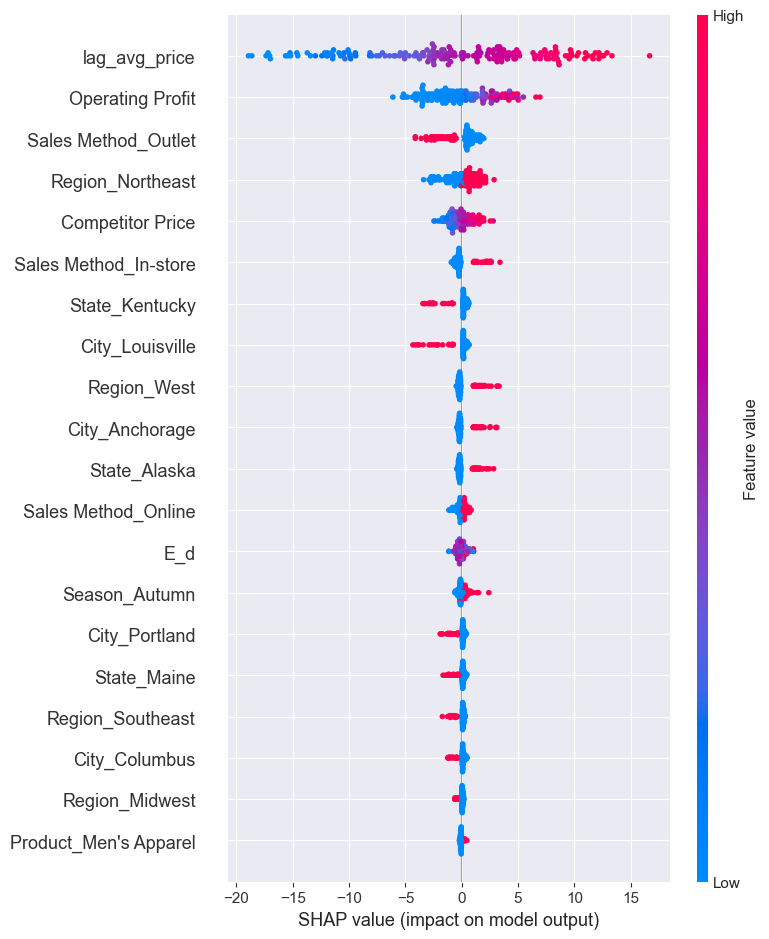

<Figure size 640x480 with 0 Axes>

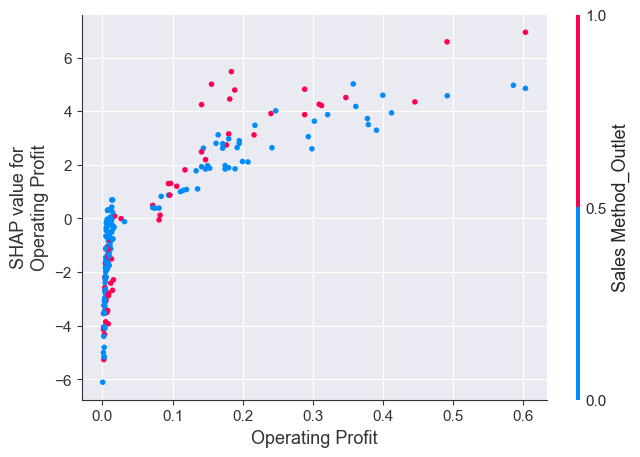

Retailer: Kohl's
Mean Squared Error: 13.968215533980583
R-squared: 0.9130531244201453


<Figure size 640x480 with 0 Axes>

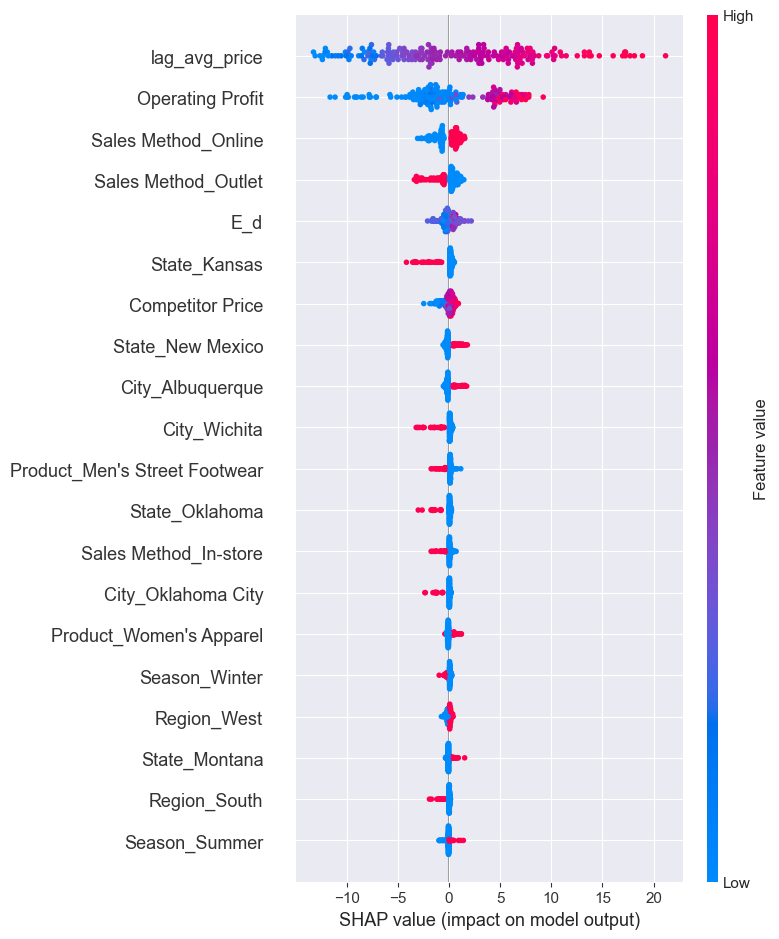

<Figure size 640x480 with 0 Axes>

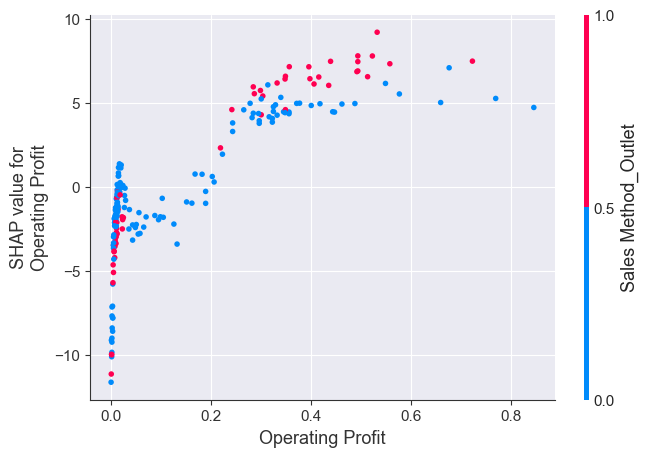

<Figure size 640x480 with 0 Axes>

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import shap
import matplotlib.pyplot as plt

for retailer,df in retailer_dfs.items():
  x = df.drop(columns=['Retailer', 'Invoice Date', 'Price per Unit', 'Units Sold', 'Total Sales', 'lag_price', 'Month', 'Day', 'Week', 'profit_percentage'])
  y=df['Price per Unit']
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
  rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
  rf_regressor.fit(x_train, y_train)
  y_pred = rf_regressor.predict(x_test)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  print(f"Retailer: {retailer}")
  print(f"Mean Squared Error: {mse}")
  print(f"R-squared: {r2}")
  explainer = shap.TreeExplainer(rf_regressor)
  shap_values = explainer(x_test)
  plt.figure()
  shap.summary_plot(shap_values, x_test, feature_names=x.columns)
  plt.figure()
  shap.dependence_plot(0, shap_values.values, x_test)
  shap.initjs()
  plt.figure()
  shap.force_plot(explainer.expected_value, shap_values.values[0], x_test.iloc[0])